In [2]:
import config
import paths
from cnn_builder import *
from config import *
from dataset_functions import *
from hypercube_set import HypercubeSet
from hypercube_loader import *
import numpy as np
import rendering
import training_history

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(os.getcwd().split("jupyter")[0])

inf = 2e32

%load_ext autoreload
%autoreload 2

read_json_config(paths.config_file, network_type=None)

In [3]:
hc_array_red, max_class_idx = load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf, folder='media/Mateus_2022/red/')

Reading media/Mateus_2022/red\raw_112_rf.hdr ...
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Reading media/Mateus_2022/red\raw_1984_rf.hdr ...
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Reading media/Mateus_2022/red\raw_3904_rf.hdr ...
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Reading media/Mateus_2022/red\raw_5744_rf.hdr ...
[0. 1. 2. 3. 4. 5. 6. 7. 8.]
Reading media/Mateus_2022/red\raw_7584_rf.hdr ...
[0. 1. 2. 3. 4.]


In [4]:
print(max_class_idx)

8


In [5]:
hc_array_white, max_class_idx = load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf, folder='media/Mateus_2022/red/', baseline_class_idx=max_class_idx)

Reading media/Mateus_2022/red\raw_112_rf.hdr ...
[ 0.  9. 10. 11. 12. 13. 14. 15. 16.]
Reading media/Mateus_2022/red\raw_1984_rf.hdr ...
[ 0.  9. 10. 11. 12. 13. 14. 15. 16.]
Reading media/Mateus_2022/red\raw_3904_rf.hdr ...
[ 0.  9. 10. 11. 12. 13. 14. 15. 16.]
Reading media/Mateus_2022/red\raw_5744_rf.hdr ...
[ 0.  9. 10. 11. 12. 13. 14. 15. 16.]
Reading media/Mateus_2022/red\raw_7584_rf.hdr ...
[ 0.  9. 10. 11. 12.]


In [6]:
hc_array = hc_array_red + hc_array_white

In [7]:
hc_set = HypercubeSet(hc_array)

In [8]:
subsamples, labels = hc_set.subsample(0.01)

samples shape:  (11980, 219)
samples shape:  (12288, 219)
samples shape:  (11776, 219)
samples shape:  (11776, 219)
samples shape:  (11776, 219)
samples shape:  (11980, 219)
samples shape:  (12288, 219)
samples shape:  (11776, 219)
samples shape:  (11776, 219)
samples shape:  (11776, 219)


In [9]:
import randomness

stratified_samples, stratified_labels = randomness.stratified_sampling(subsamples, labels)

In [10]:
print(stratified_samples.shape)

(6970, 219)


In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import dsi_metric
import tabulate

n_components = 30
random_seed = 42
feature_reduction_algorithms = [ PCA(n_components=n_components, random_state=random_seed),  FactorAnalysis(n_components=n_components, random_state=random_seed), TruncatedSVD(n_components=n_components, random_state=random_seed), NMF(n_components=n_components, random_state=random_seed), LDA(n_components=16) ]
feature_reduction_algorithm_name = [ "PCA", "FactorAnalysis", "TruncatedSVD", "NMF", "LDA" ]
metrics_algorithm = []

for num_components in range(5, 100, 5):
    for (algorithm, algorithm_name) in zip(feature_reduction_algorithms, feature_reduction_algorithm_name):
        print(algorithm_name)
        # if algorithm_name == "LDA":
        #     Xp = algorithm.fit_transform(stratified_samples, stratified_labels)
        # else:
        #     Xp = algorithm.fit_transform(stratified_samples)
        #
        # # Split train and test data
        # X_train, X_test, y_train, y_test = train_test_split(Xp, stratified_labels, test_size=0.2, random_state=42)
        #
        # # Train RF with k-fold cross-validation
        # scores = []
        # classifier = svm.SVC(kernel='rbf', C=1)
        # k_fold = KFold(n_splits=5, shuffle=False)
        #
        # for train_indices, validation_indices in k_fold.split(X_train):
        #     X_train_2, X_validation, y_train_2, y_validation = X_train[train_indices], X_train[validation_indices], y_train[train_indices], y_train[validation_indices]
        #     classifier.fit(X_train_2, y_train_2)
        #     scores.append(classifier.score(X_validation, y_validation))
        #
        # y_pred = classifier.predict(X_test)
        # accuracy = accuracy_score(y_test, y_pred)
        # dsi = dsi_metric.separability_index_ks_2samp(Xp, stratified_labels)

        metrics_algorithm.append([algorithm_name, num_components, np.random.random(), np.random.random()])

# print(tabulate.tabulate(dsi_algorithm, headers=["Algorithm", "DSI"]))

PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA
PCA
FactorAnalysis
TruncatedSVD
NMF
LDA


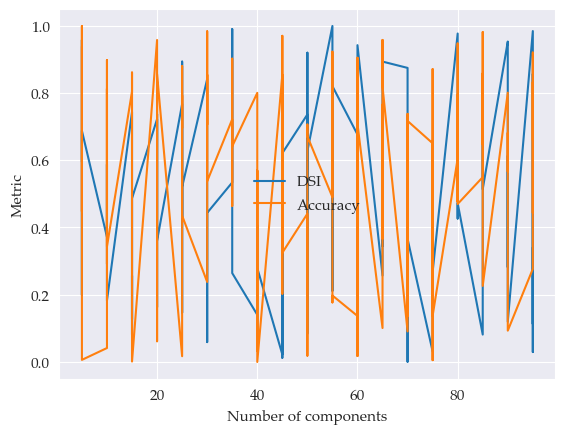

In [40]:
# Create dataframe from metrics
metrics_df = pd.DataFrame(metrics_algorithm, columns=["Algorithm", "Components", "DSI", "Accuracy"])

# Plot
plt.plot(metrics_df["Components"], metrics_df["DSI"], label="DSI")
plt.plot(metrics_df["Components"], metrics_df["Accuracy"], label="Accuracy")
plt.xlabel("Number of components")
plt.ylabel("Metric")
plt.legend(frameon=False)
plt.savefig("media/Mateus_2022/feature_reduction.png", dpi=500, bbox_inches='tight')
plt.show()

In [13]:
from sklearn.decomposition import PCA
import dsi_metric

pca = PCA(n_components=2).fit(stratified_samples)
Xp = pca.transform(stratified_samples)
# print(dsi_metric.separability_index_ks_2samp(Xp, stratified_labels))

In [14]:
palatino_font_family = 'Palatino Linotype'
title_font = {'fontname': 'Adobe Devanagari', 'size': 14}
regular_font = {'fontname': 'Adobe Devanagari', 'size': 12}
axis_label_font = {'fontname': 'Adobe Devanagari', 'size': 14}
font = font_manager.FontProperties(family='Palatino Linotype', size=11)

In [31]:
font_mapping = {'family': 'Palatino Linotype', 'weight': 'normal', 'size': 11}
plt.rc('font', **font_mapping)

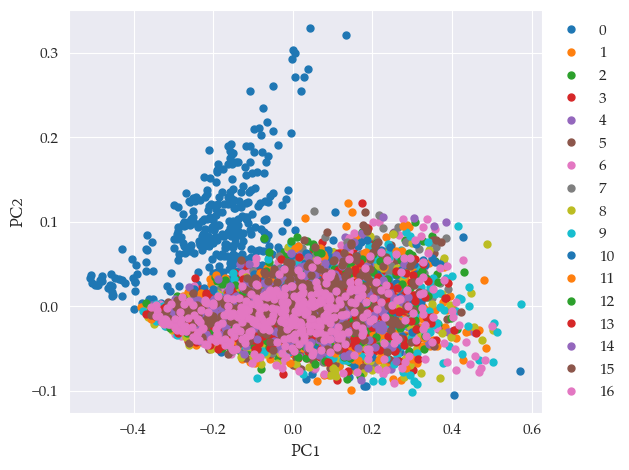

In [28]:
%matplotlib inline
import pandas as pd

pca_df = pd.DataFrame(Xp, columns=["PC1", "PC2"])
labels_df = pd.DataFrame([int(c) for c in stratified_labels], columns=["Label"])
pca_df = pd.concat([pca_df, labels_df], axis=1)
groups = pca_df.groupby("Label")

fig, ax = plt.subplots()
ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.PC1, group.PC2, marker="o", linestyle="", ms=5, label=name, alpha=1)

ax.set_xlabel('PC1', **axis_label_font)
ax.set_ylabel('PC2', **axis_label_font)
for label in ax.get_xticklabels():
    label.set_fontproperties(font)
for label in ax.get_yticklabels():
    label.set_fontproperties(font)

ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc='upper left', prop=font)
plt.tight_layout()
plt.savefig("PCA.png", dpi=500, bbox_inches='tight')

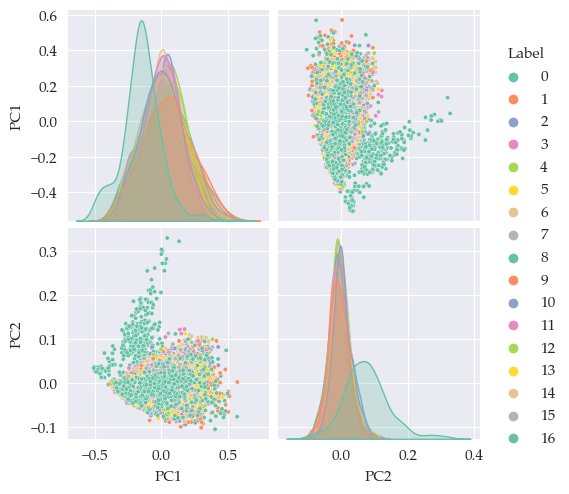

In [33]:
import seaborn as sns

sns.pairplot(pca_df, hue="Label", height=2.5, palette="Set2", plot_kws={"s": 10}, diag_kind="kde")
plt.savefig("PCA_Pairplot.png", dpi=500, bbox_inches='tight')

In [10]:
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline
import os

In [11]:
palatino_font_family = 'Palatino Linotype'

def show_in_window(fig):
    import sys, os
    import plotly.offline
    from PyQt5.QtCore import QUrl
    from PyQt5.QtWebEngineWidgets import QWebEngineView
    from PyQt5.QtWidgets import QApplication

    filename = "Components.html"
    plotly.offline.plot(fig, filename=filename, auto_open=False)

    app = QApplication(sys.argv)
    web = QWebEngineView()
    file_path = os.path.abspath(os.path.join(os.path.dirname("__file__"), filename))
    web.load(QUrl.fromLocalFile(file_path))
    web.show()
    sys.exit(app.exec_())

def plot_3d(component1, component2, component3, labels, annotations):
    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=5,
            color=labels,  # set color to an array/list of desired values
            colorscale='Viridis',  # choose a colorscale
            opacity=1,
            line_width=1,
            colorbar=dict(
                title="Red Variety"
            ),
        ),
    )])
    # tight layout
    ann = [dict(x=x, y=y, z=z, text=annotation, showarrow=False) for x, y, z, annotation in zip(component1, component2, component3, annotations)]
    # fig.update_layout(
    #     scene=dict(
    #         annotations=ann
    #     )
    # )
    #fig.update_layout(margin=dict(l=50, r=50, b=50, t=50), width=1080, height=975)
    fig.layout.template = 'plotly'
    fig.update_layout(
        font_family=palatino_font_family,
        font_size=14,
        title_font_family=palatino_font_family,
        width=1200,
        height=800
    )
    fig.update_xaxes(title_font_family=palatino_font_family)
    fig.update_layout(showlegend=False)

    config = {
      'toImageButtonOptions': {
        'format': 'png', # one of png, svg, jpeg, webp
        'filename': 'D:/Test',
        'scale': 6 # Multiply title/legend/axis/canvas sizes by this factor
      }
    }

    #fig.show(config=config)
    show_in_window(fig)

In [13]:
reduction = HypercubeSet.reduce_layers(stratified_samples, stratified_labels, n_layers=50, selection_method=LayerSelectionMethod.PCA)
Xp = reduction.transform(stratified_samples)

# Apply t-SNE over reduced data
embedding = embed_manifold(Xp, tsne=False, num_components=3)

plot_3d(embedding[:, 0], embedding[:, 1], embedding[:, 2], stratified_labels, stratified_labels)

SystemExit: 0

C:\Users\allopezr\Documents\GitHub\VineyardUAVClassification\venv\lib\site-packages\IPython\core\interactiveshell.py:3441: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [10]:
# Calculate mean signature per class
mean_signatures = []
labels = np.unique(stratified_labels)
for label in labels:
    class_samples = stratified_samples[stratified_labels == label]
    mean_signatures.append(np.mean(class_samples, axis=0))

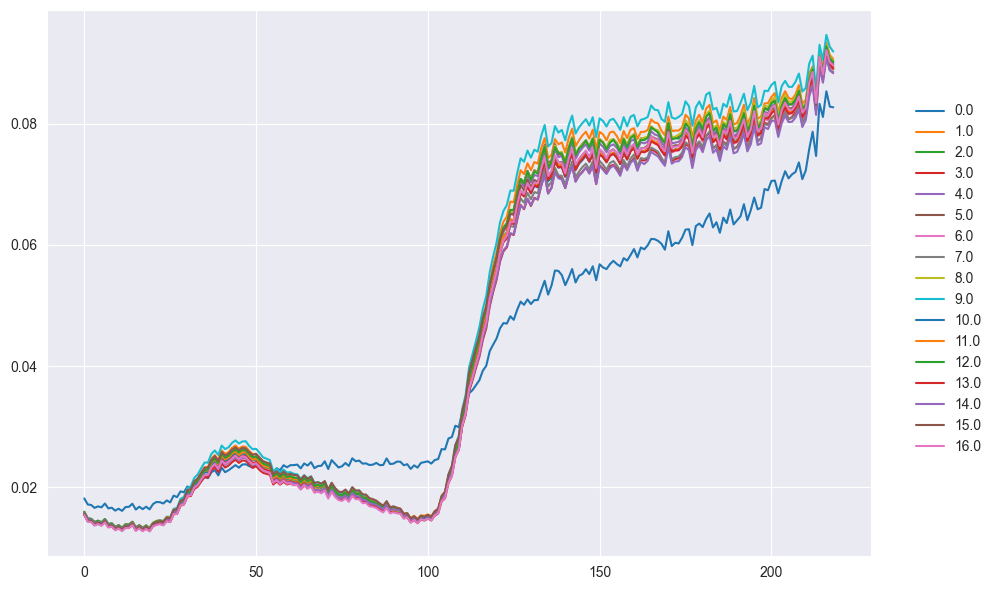

In [21]:
# Plot mean signatures
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
for label, mean_signature in zip(labels, mean_signatures):
    ax.plot(mean_signature, label=label)
ax.legend(frameon=False, bbox_to_anchor=(1.15, 0.85))
plt.tight_layout()